In [1]:
from casadi import *
import matplotlib.pyplot as plt
import numpy as np

## Pendulum exercise
$$
\begin{split}\begin{array}{lc}
\begin{array}{l}
\text{minimize:} \\
x(\cdot) \in \mathbb{R}^2, \, u(\cdot) \in \mathbb{R}
\end{array}
\quad \displaystyle \int_{t=0}^{T}{cos(x_0) \, dt}
\\
\\
\text{subject to:} \\
\\
\begin{array}{ll}
\left\{
\begin{array}{l}
\dot{x}_0 = x_1 \\
\dot{x}_1 = u - sin(x_0) \\
-u_{max} \le u \le u_{max} , \quad
\end{array} \right. & \text{for} \, 0 \le t \le T \\
x_0(0)=0, \quad x_1(0)=0, x_0(T) = pi/2 , x_1(T) = 0
\end{array}
\end{array}\end{split}
$$
with $T=10$.

siendo $$x_0 = \theta$$ $$x_1 = \theta'$$

In [58]:
x = MX.sym('x', 2)
t = MX.sym('t')
dt = MX.sym('dt')
u = MX.sym('u')

In [59]:
rhs = vertcat(x[1], u-sin(x[0]))
#rhs = vertcat(x[1], u)
F = Function('F', [x, u], [rhs])

k1 = F(x, u);
k2 = F(x + dt/2 * k1, u)
k3 = F(x + dt/2 * k2, u)
k4 = F(x + dt * k3, u);
new_x_expr = x+dt/6*(k1 +2*k2 +2*k3 +k4)

In [60]:
new_x_expr = x + dt * F(x, u)
new_x = Function('New_x', [x, u, dt], [new_x_expr])

In [61]:
F([0,1],2)

DM([1, 2])

In [62]:
new_x([0,1],2,0.1)

DM([0.1, 1.2])

In [120]:
N = 100
T = 30

In [121]:
opti = Opti()
opti.solver('ipopt')

In [122]:
X = opti.variable(N+1,2)
U = opti.variable(N)
u_m = opti.parameter()

In [123]:
cost = sum1(cos(X[:,0]))
#cost = -sum1(X[:,0])
opti.minimize(cost)

In [130]:
max_par = 0.1
opti.set_value(u_m, max_par)

In [125]:
opti.subject_to(X[0,:].T == [0, 0])
#opti.subject_to(X[-1,:].T == [pi, 0])
opti.subject_to(X[-1,0].T == [pi])

arr[3,:], new_x(arr[2,:])

In [126]:
for ii in range(N):
    opti.subject_to(X[ii+1,:].T == new_x(X[ii,:], U[ii], T/N))
    #opti.subject_to(U[ii] > -u_m)
    opti.subject_to(opti.bounded(-u_m,U[ii],u_m))

In [127]:
opti.set_initial(X[:,0], np.linspace(0, pi, N+1))
opti.set_initial(X[:,1], pi/N)

In [131]:
sol = opti.solve()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      703
Number of nonzeros in inequality constraint Jacobian.:      100
Number of nonzeros in Lagrangian Hessian.............:      101

Total number of variables............................:      302
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      203
Total number of inequality constraints...............:      100
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:      100
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

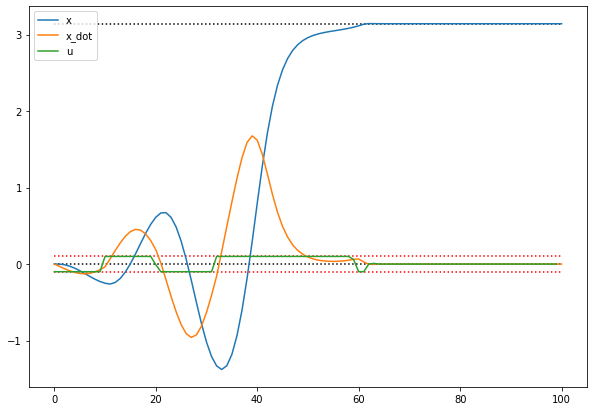

In [132]:
arr = sol.value(X)
arr_u = sol.value(U)
plt.figure(figsize=[10,7])
plt.plot(arr[:,0], label = 'x')
plt.plot(arr[:,1], label = 'x_dot')
plt.plot(arr_u[:], label = 'u')
plt.hlines([0,pi], 0, N, 'k', 'dotted')
plt.hlines([-max_par,max_par], 0, N, 'r', 'dotted')
plt.legend()

In [37]:
cos(arr[:,0])

DM([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [60]:
cos(np.linspace(0, pi, N+1))

DM([1, 0.999507, 0.998027, 0.995562, 0.992115, 0.987688, 0.982287, 0.975917, 0.968583, 0.960294, 0.951057, 0.940881, 0.929776, 0.917755, 0.904827, 0.891007, 0.876307, 0.860742, 0.844328, 0.827081, 0.809017, 0.790155, 0.770513, 0.750111, 0.728969, 0.707107, 0.684547, 0.661312, 0.637424, 0.612907, 0.587785, 0.562083, 0.535827, 0.509041, 0.481754, 0.45399, 0.425779, 0.397148, 0.368125, 0.338738, 0.309017, 0.278991, 0.24869, 0.218143, 0.187381, 0.156434, 0.125333, 0.0941083, 0.0627905, 0.0314108, -1.60812e-16, -0.0314108, -0.0627905, -0.0941083, -0.125333, -0.156434, -0.187381, -0.218143, -0.24869, -0.278991, -0.309017, -0.338738, -0.368125, -0.397148, -0.425779, -0.45399, -0.481754, -0.509041, -0.535827, -0.562083, -0.587785, -0.612907, -0.637424, -0.661312, -0.684547, -0.707107, -0.728969, -0.750111, -0.770513, -0.790155, -0.809017, -0.827081, -0.844328, -0.860742, -0.876307, -0.891007, -0.904827, -0.917755, -0.929776, -0.940881, -0.951057, -0.960294, -0.968583, -0.975917, -0.982287, -0.

In [63]:
-sum1(np.linspace(0, pi, N+1))

DM(-158.65)

In [59]:
opti.debug.show_infeasibilities()

Violated constraints (tol 0), in order of declaration:
------- i = 0/302 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-53-cde4a71de779>:1
At nonzero 0.
------- i = 1/302 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-53-cde4a71de779>:1
At nonzero 1.
------- i = 2/302 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-54-94e39e3ed272>:2
At nonzero 0.
------- i = 3/302 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-54-94e39e3ed272>:2
At nonzero 1.
------- i = 5/302 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/

Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-54-94e39e3ed272>:2
At nonzero 1.
------- i = 212/302 ------ 
0 <= -2.8299e-74 <= 0 (viol 2.8299e-74)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-54-94e39e3ed272>:2
At nonzero 0.
------- i = 213/302 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-54-94e39e3ed272>:2
At nonzero 1.
------- i = 215/302 ------ 
0 <= -2.8299e-73 <= 0 (viol 2.8299e-73)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-54-94e39e3ed272>:2
At nonzero 0.
------- i = 216/302 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-54-94e39e3ed272>:2
At nonzero 1.
-

In [44]:
sum1(cos(arr[:,0]))

DM(101)

In [45]:
sol.value(U)

array([ 0.00000000e+00,  1.22026922e-30, -5.55111518e-17, -5.55111518e-17,
        1.66533455e-16,  1.11022304e-16, -1.66533455e-16,  2.22044607e-16,
       -9.76215380e-30,  5.55111518e-17, -2.22044607e-16, -5.55111518e-16,
       -3.33066911e-16,  3.33066911e-16,  2.22044607e-16, -6.16297588e-31,
       -4.44089214e-16, -5.55111518e-16, -1.11022304e-16,  9.99200732e-16,
        3.33066911e-16,  3.33066911e-16,  3.33066910e-16,  1.11022303e-16,
       -7.77156125e-16,  3.33066911e-16,  7.77156125e-16, -5.55111518e-16,
        7.77156125e-16, -1.11022304e-16, -3.33066910e-16, -1.60982340e-15,
       -1.11022304e-16,  1.05471188e-15,  1.44328995e-15, -4.99600366e-16,
       -1.11022303e-16, -1.38777880e-15,  7.77156125e-16,  1.27675649e-15,
       -1.11022304e-16, -9.43689582e-16, -9.99200732e-16, -5.55111518e-16,
        1.66533455e-15, -1.44328995e-15,  1.22124534e-15,  1.22124534e-15,
        7.77156125e-16,  1.44328994e-15,  0.00000000e+00,  3.33066905e-16,
       -1.44328995e-15, -